This notebook looks at the summary data for the three projections.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

import os
import pickle
import pandas as pd

In [2]:
from d3g2d import rcparams
for key in rcparams: mpl.rcParams[key] = rcparams[key]

In [3]:
foldername = '../data/tng_highres_z0.4_sum/xy/'

In [4]:
haloIDs_new = []
for f in [f for f in os.listdir(foldername) if f.endswith('.npy')]:
    haloIDs_new.append( int(f.split('_')[3]) )

In [5]:
summary_datapath = '../data/tng_highres_z0.4_sum/'

In [6]:
cols = ['catsh_id', 'logms', 'aper_x0', 'aper_y0', 'aper_ba', 'aper_pa', \
        'aper_rkpc', 'aper_logms', 'rpix_shape', 'rkpc_shape', \
        'mu_shape', 'mu_err_shape', 'e_shape', 'e_err_shape', \
        'pa_shape', 'pa_err_shape', 'maper_shape', 'rpix_prof', \
        'rkpc_prof', 'mu_prof', 'mu_err_prof', 'maper_prof', \
        'a1_shape', 'a1_err_shape', 'a2_shape', 'a2_err_shape', \
        'a3_shape', 'a3_err_shape', 'a4_shape', 'a4_err_shape', \
        'b1_shape', 'b1_err_shape', 'b2_shape', 'b2_err_shape', \
        'b3_shape', 'b3_err_shape', 'b4_shape', 'b4_err_shape']
cols = [f for f in cols if not f.__contains__('id') and not f.__contains__('rpix') and \
        not f.__contains__('rkpc')]
print(cols)

['logms', 'aper_x0', 'aper_y0', 'aper_ba', 'aper_pa', 'aper_logms', 'mu_shape', 'mu_err_shape', 'e_shape', 'e_err_shape', 'pa_shape', 'pa_err_shape', 'maper_shape', 'mu_prof', 'mu_err_prof', 'maper_prof', 'a1_shape', 'a1_err_shape', 'a2_shape', 'a2_err_shape', 'a3_shape', 'a3_err_shape', 'a4_shape', 'a4_err_shape', 'b1_shape', 'b1_err_shape', 'b2_shape', 'b2_err_shape', 'b3_shape', 'b3_err_shape', 'b4_shape', 'b4_err_shape']


<Figure size 720x432 with 0 Axes>

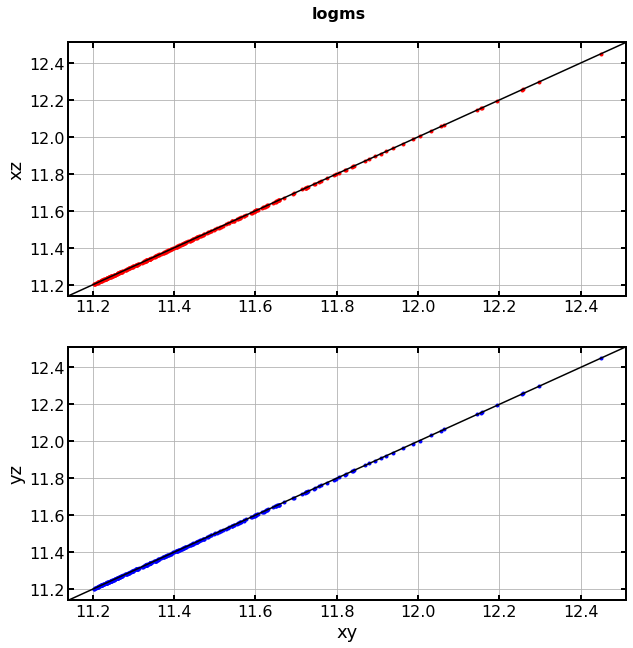

<Figure size 720x432 with 0 Axes>

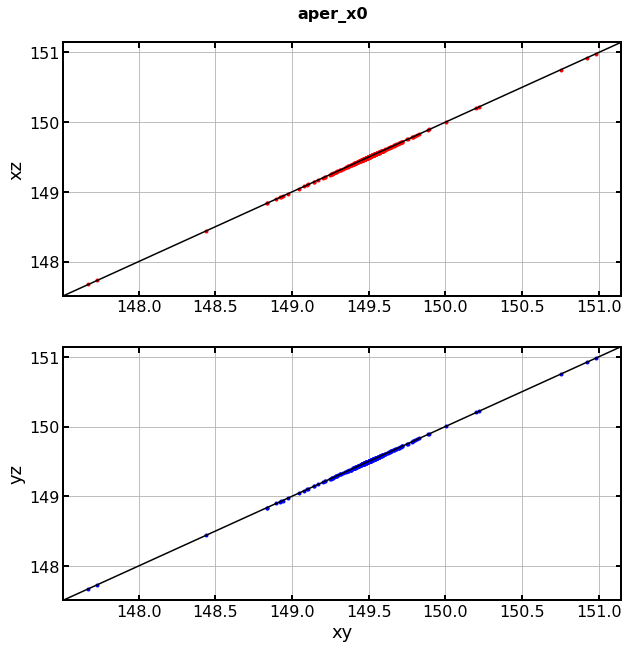

<Figure size 720x432 with 0 Axes>

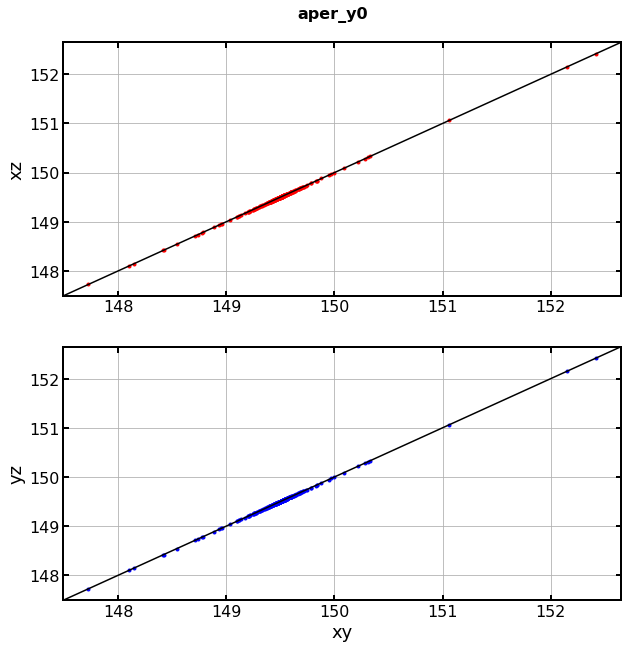

<Figure size 720x432 with 0 Axes>

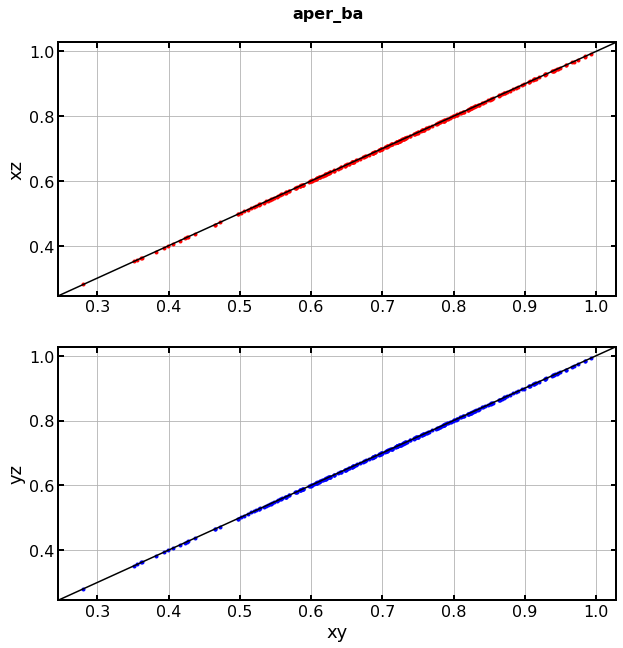

<Figure size 720x432 with 0 Axes>

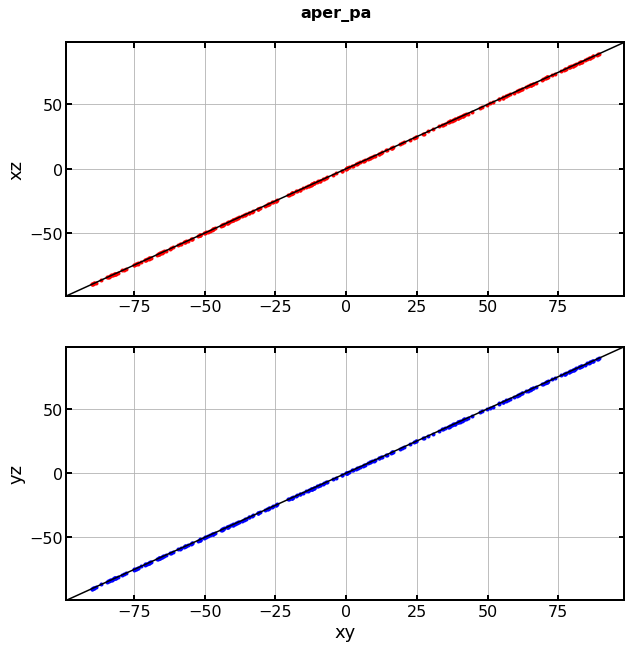

<Figure size 720x432 with 0 Axes>

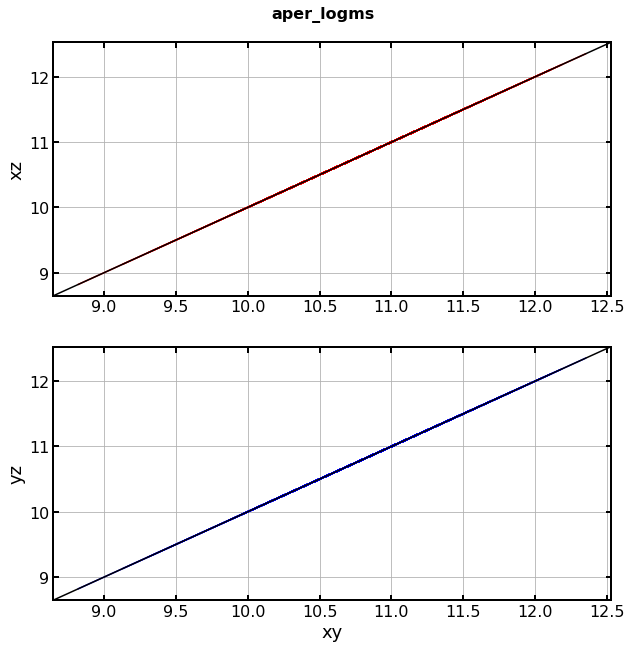

/Users/humnaawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


<Figure size 720x432 with 0 Axes>

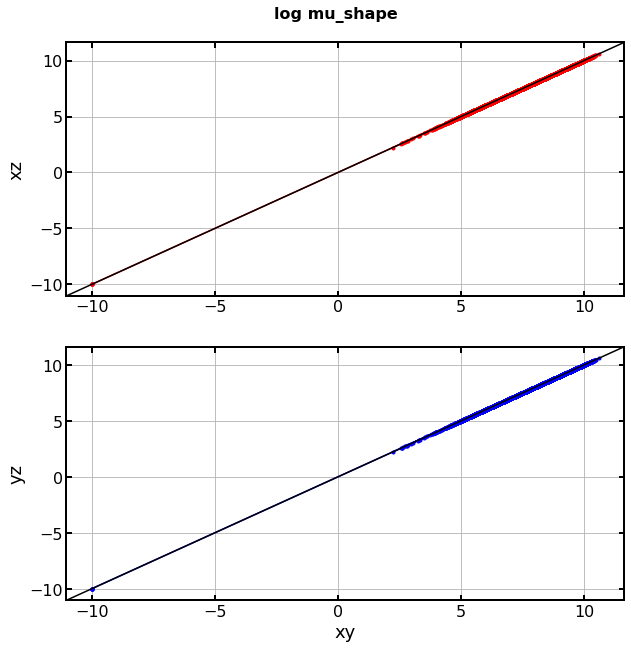

<Figure size 720x432 with 0 Axes>

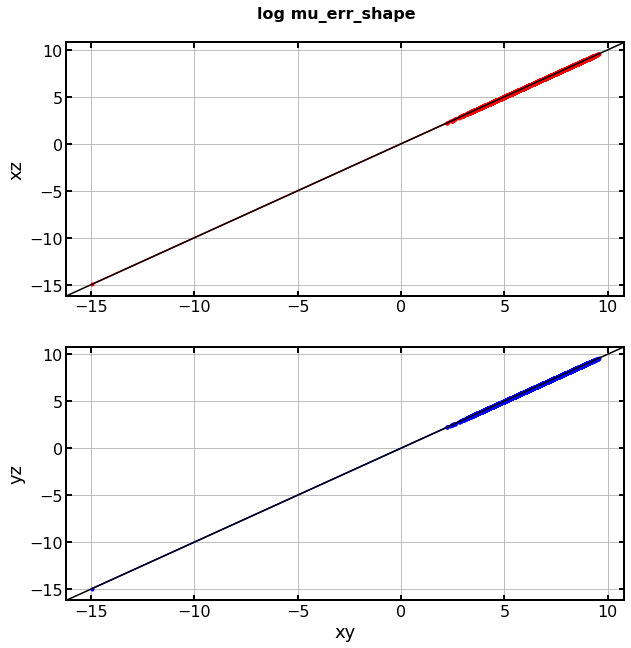

<Figure size 720x432 with 0 Axes>

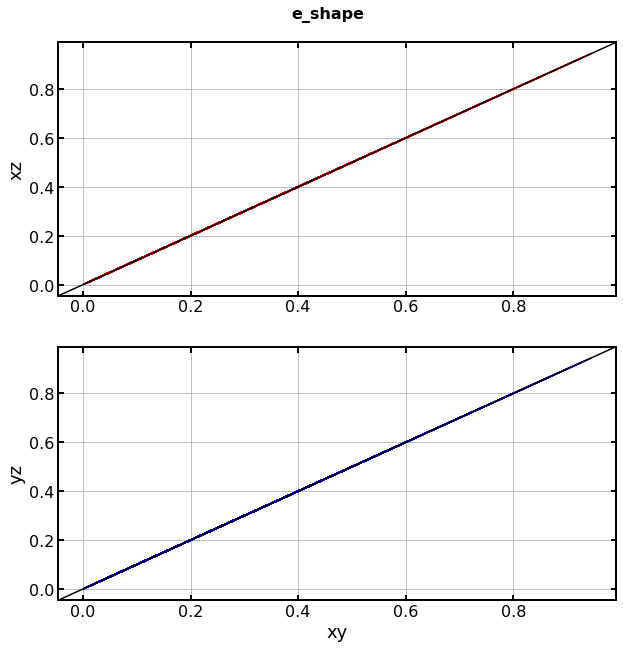

<Figure size 720x432 with 0 Axes>

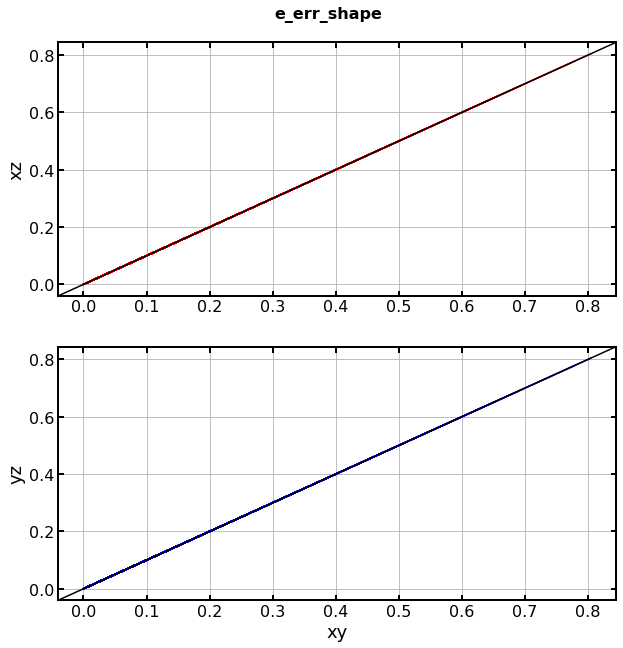

<Figure size 720x432 with 0 Axes>

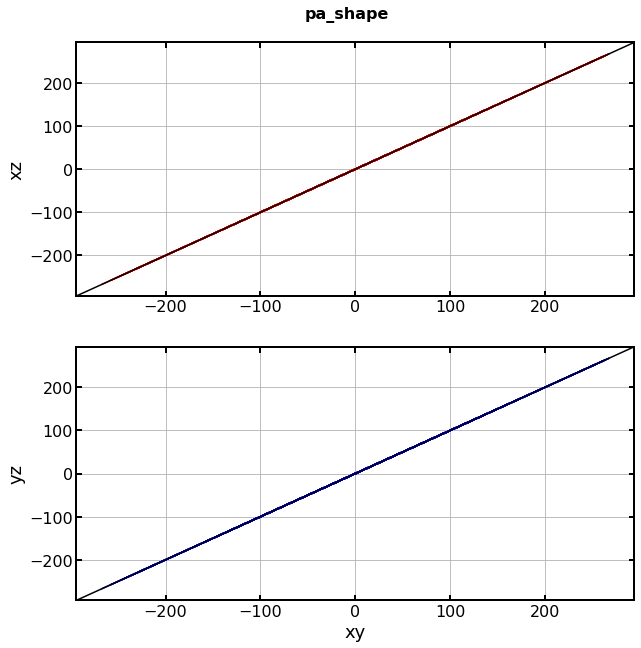

<Figure size 720x432 with 0 Axes>

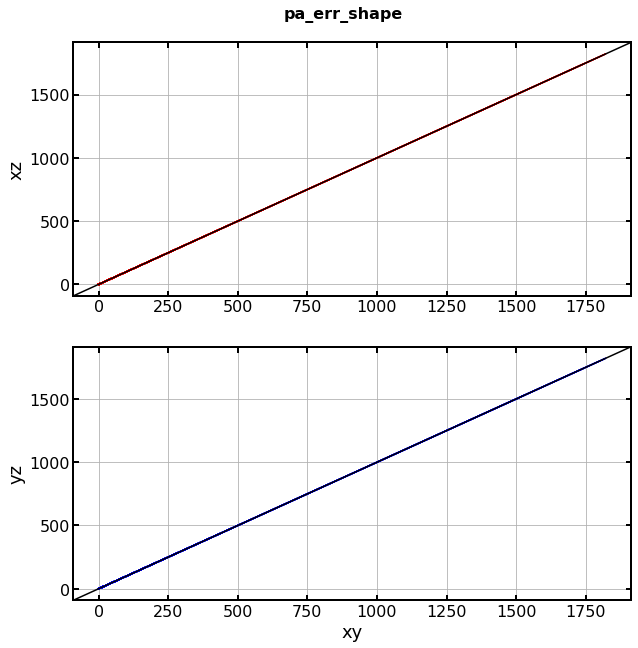

<Figure size 720x432 with 0 Axes>

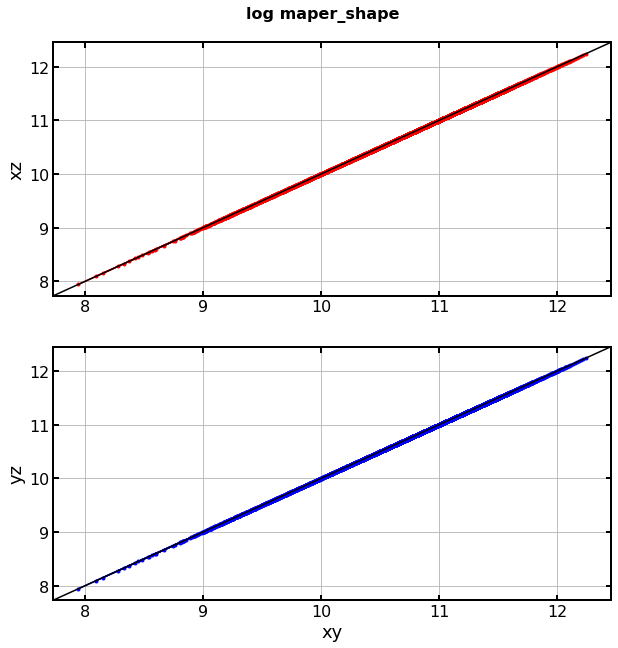

<Figure size 720x432 with 0 Axes>

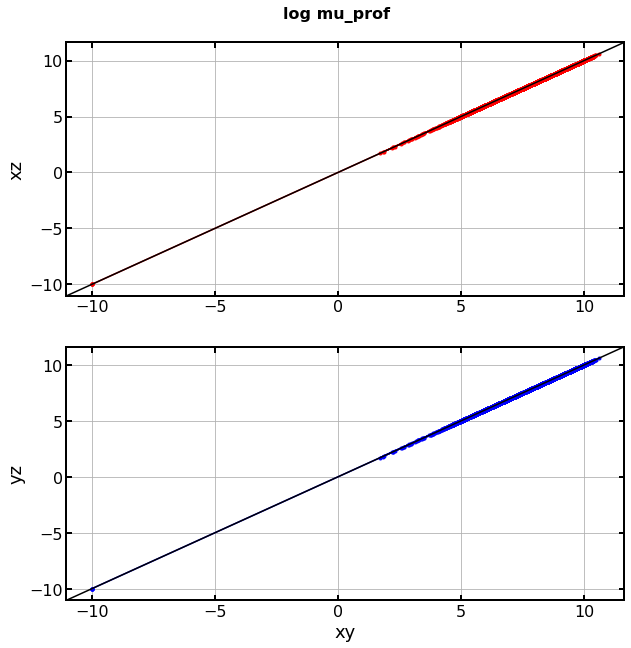

<Figure size 720x432 with 0 Axes>

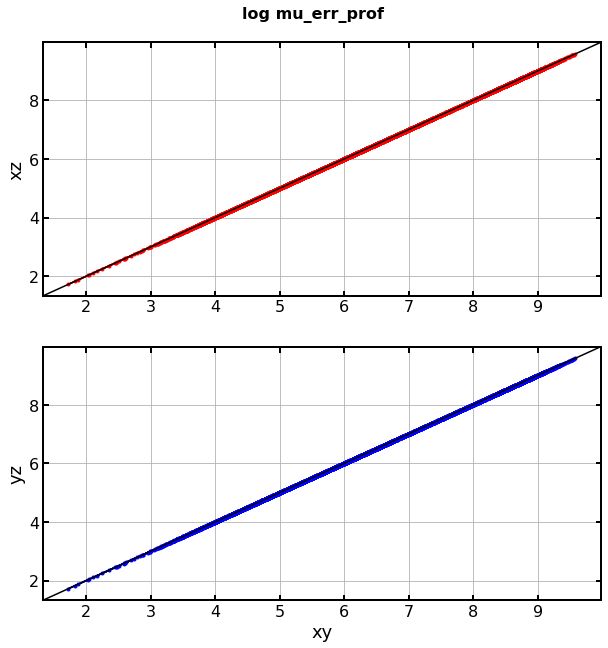

<Figure size 720x432 with 0 Axes>

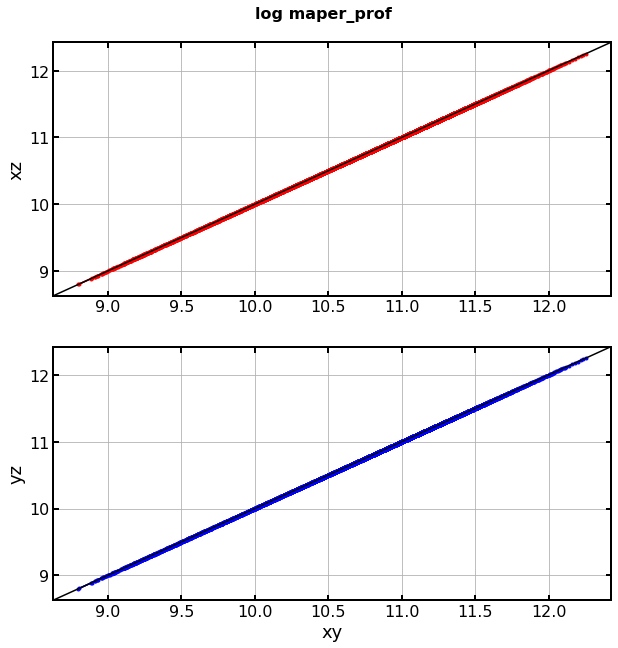

<Figure size 720x432 with 0 Axes>

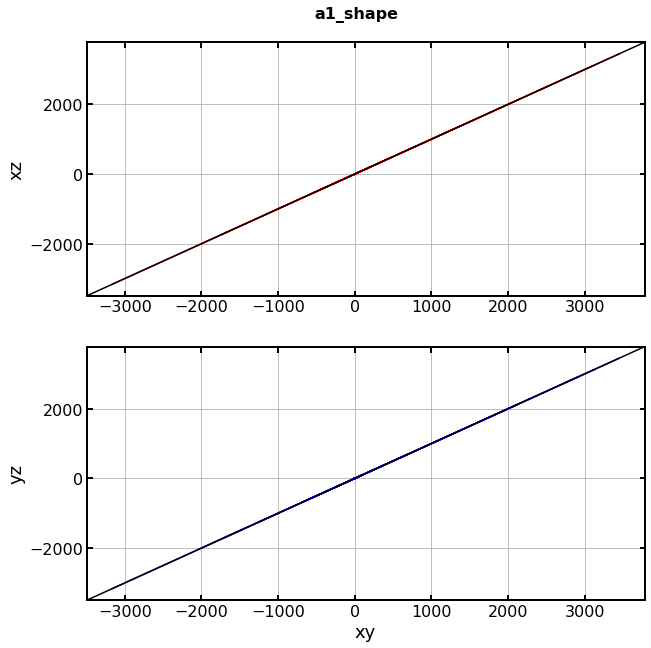

<Figure size 720x432 with 0 Axes>

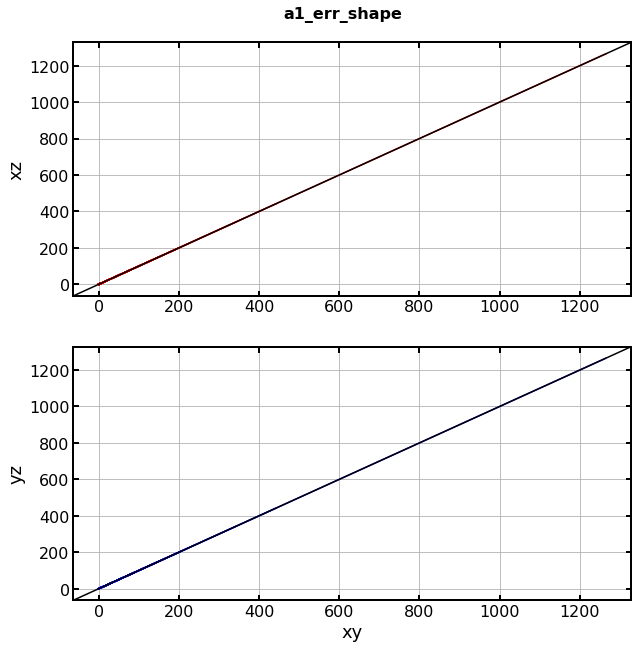

<Figure size 720x432 with 0 Axes>

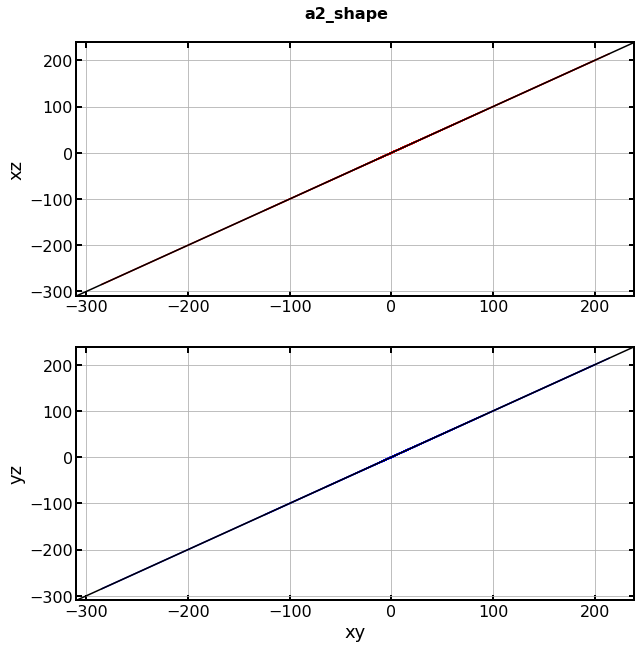

<Figure size 720x432 with 0 Axes>

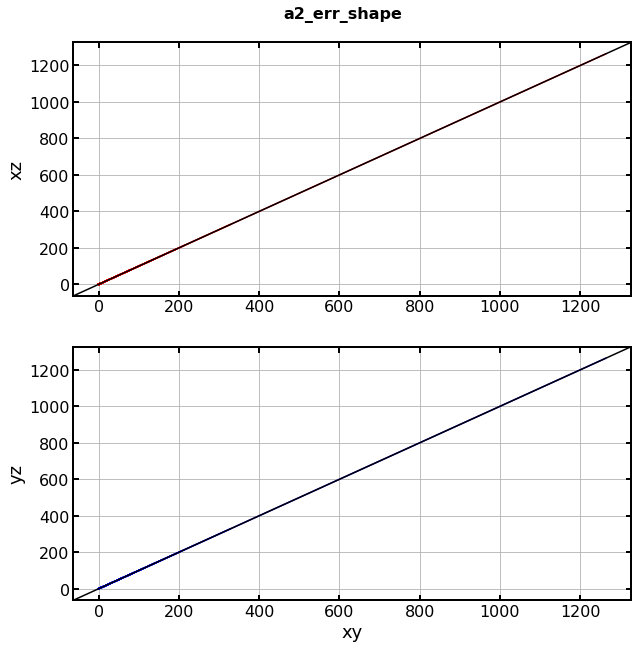

<Figure size 720x432 with 0 Axes>

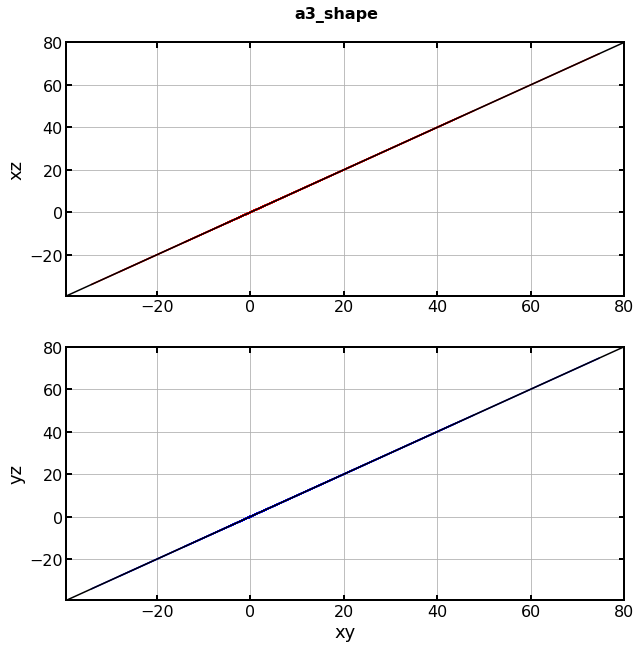

<Figure size 720x432 with 0 Axes>

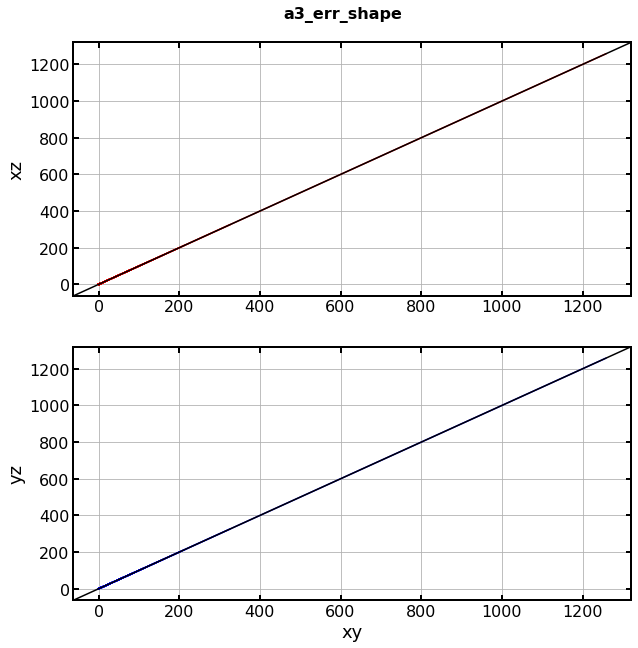

<Figure size 720x432 with 0 Axes>

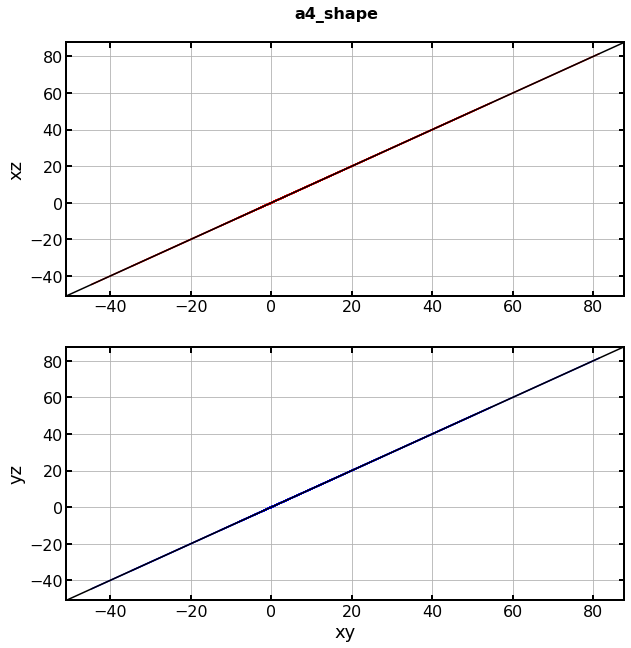

<Figure size 720x432 with 0 Axes>

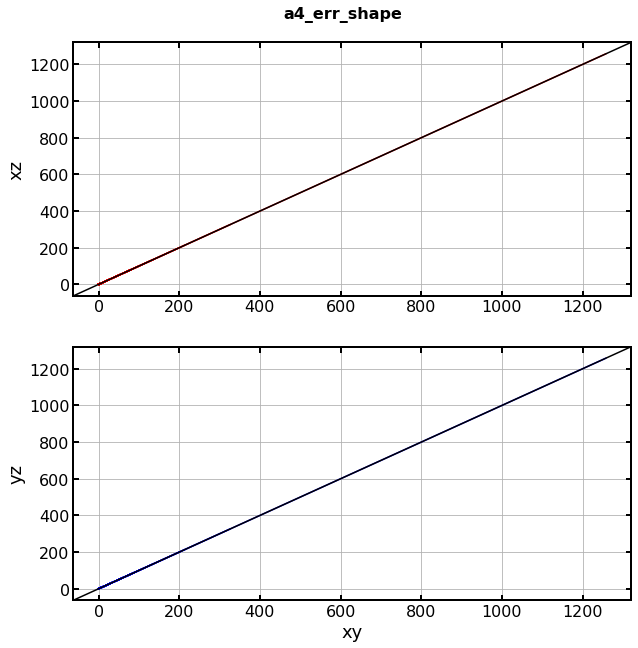

<Figure size 720x432 with 0 Axes>

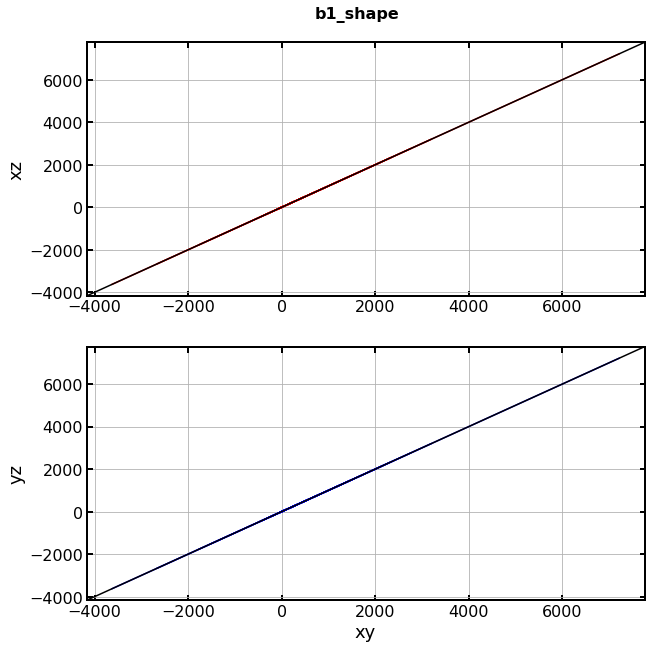

<Figure size 720x432 with 0 Axes>

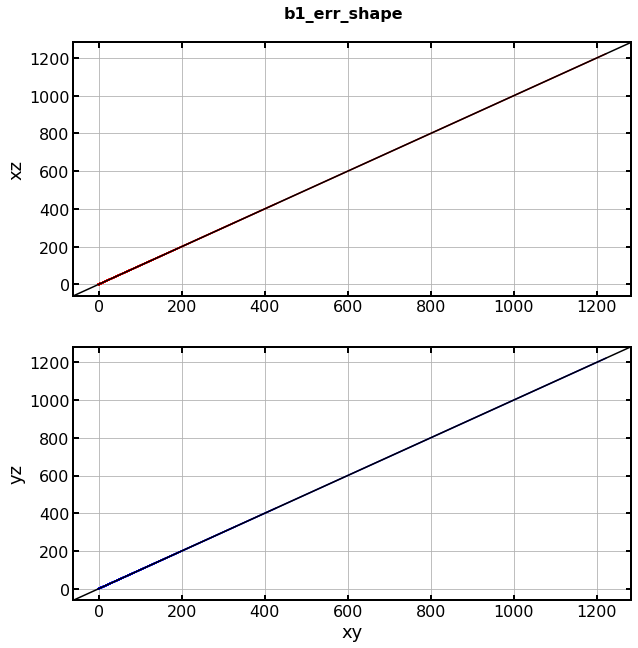

<Figure size 720x432 with 0 Axes>

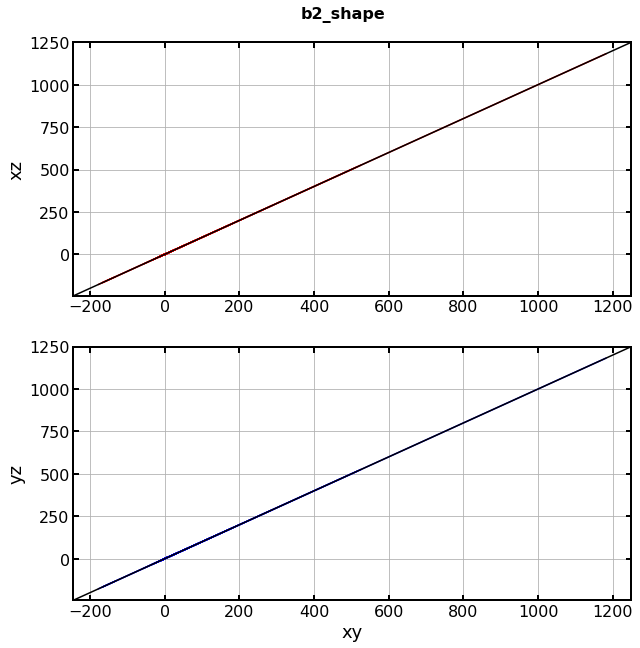

<Figure size 720x432 with 0 Axes>

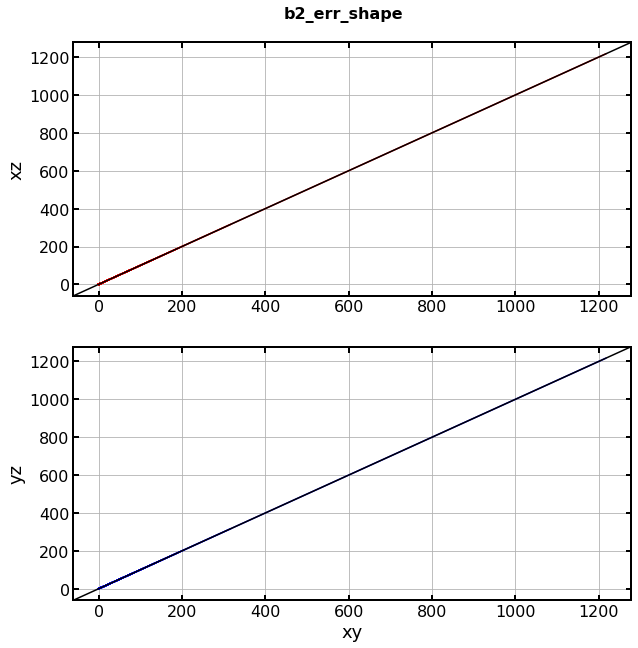

<Figure size 720x432 with 0 Axes>

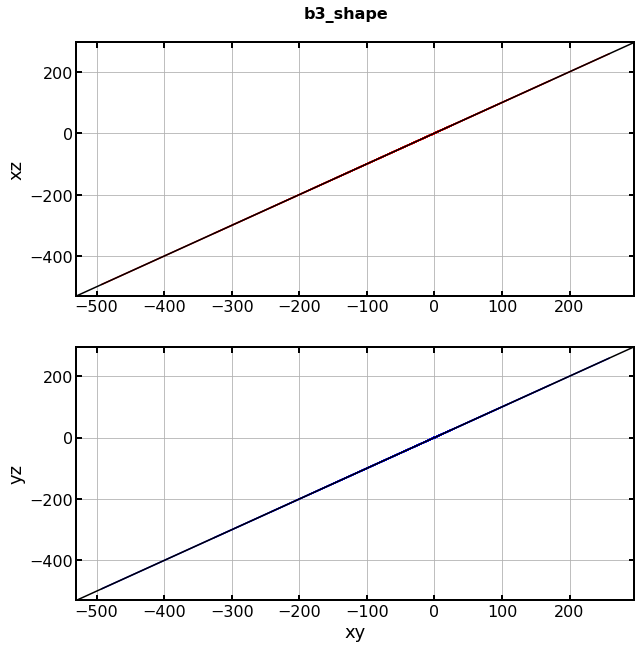

<Figure size 720x432 with 0 Axes>

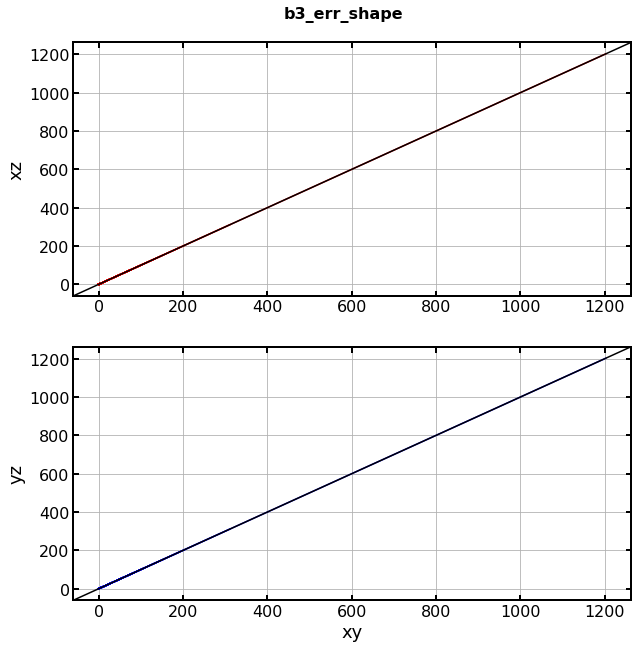

<Figure size 720x432 with 0 Axes>

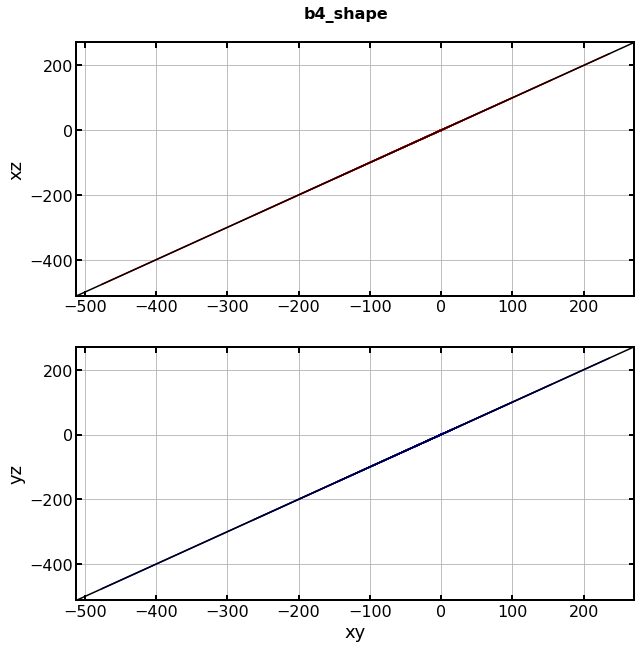

<Figure size 720x432 with 0 Axes>

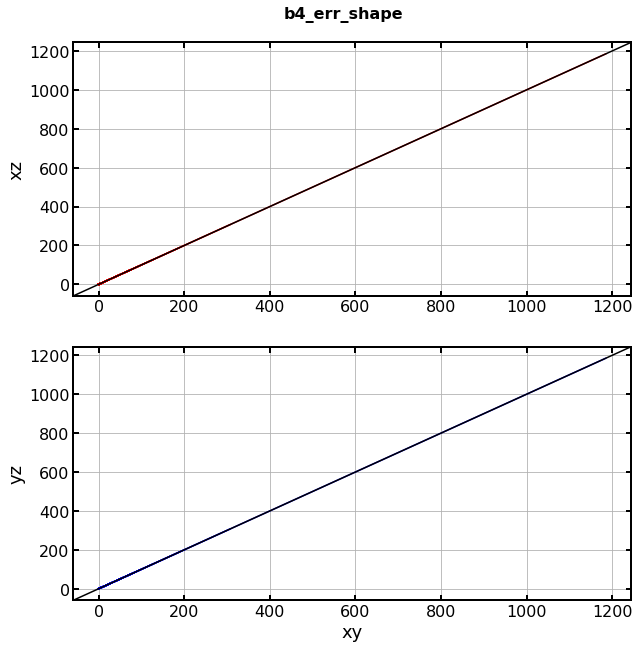

In [7]:
colors = ['r', 'b']
for key in cols:
    plt.clf()
    nrows, ncols = 2, 1
    fig, axes = plt.subplots(nrows, ncols)
    plt.subplots_adjust(wspace=0.3, hspace=0.2, top=0.9)

    for i, haloId in enumerate(haloIDs_new):
        #print(haloId)
        # first get the x-y data
        filename = [f for f in os.listdir('%s/%s' % (summary_datapath, 'xy') ) \
                        if f.__contains__('_%s_'%haloId)][0]
        data_xy = np.load('%s/%s/%s' % (summary_datapath, 'xy', filename))
        
        # now consider xz, yz data
        for j, proj_tag in enumerate( ['xz', 'yz'] ):

            filename = [f for f in os.listdir('%s/%s' % (summary_datapath, proj_tag) ) \
                        if f.__contains__('_%s_'%haloId)][0]        
            data = np.load('%s/%s/%s' % (summary_datapath, proj_tag, filename))

            if isinstance(data_xy[key], float):
                sym = '.'
            else:
                sym = '-'
            if key.__contains__('maper') or key.__contains__('mu_'):
                axes[j].plot( np.log10( data_xy[key] ), np.log10( data_xy[key] ), '%s.-' % colors[j])
                
            else:
                axes[j].plot( data_xy[key], data_xy[key], '%s%s' % ( colors[j], sym) )
            axes[j].set_ylabel(proj_tag)
            
    for row in range(nrows):
        ymin, ymax = axes[row].get_ylim()
        xmin, xmax = axes[row].get_xlim()
        axes[row].plot([xmin, xmax], [ymin, ymax], 'k-')
        axes[row].set_xlim( [xmin, xmax] )
        axes[row].set_ylim( [ymin, ymax] )
        
    axes[-1].set_xlabel('xy')
    if key.__contains__('maper') or key.__contains__('mu_'):
        plt.suptitle('log %s' % key, y=0.95, fontsize=16, fontweight="bold")
    else:
        plt.suptitle(key, y=0.95, fontsize=16, fontweight="bold")
    fig.set_size_inches(10, 10)
    plt.show()